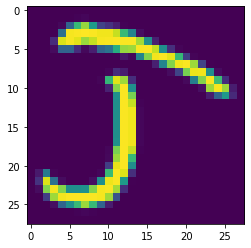

J
Temps d'execution du programme: 0.22271347045898438 s


In [185]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import time

'''
Sources pour importer les donnees:
https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python
'''
start = time.time()

image_size = 28
num_images = 10000
N = 10

f = gzip.open('samples/emnist-letters-train-images-idx3-ubyte.gz', 'r') # importation de la base de donnees d'images de lettres
f.read(16)
buf = f.read( image_size * image_size * num_images) # buffer
data = np.frombuffer(buf, dtype = np.uint8).astype(np.float32) # Interpret a buffer as a 1-dimensional array.
data = data.reshape(num_images, image_size, image_size, 1) # reshape a la bonne taille

image = np.asarray(data[N]).squeeze() # L'image n'est pas dans le bon sens
image = np.fliplr(image) # Donc on la flip 
image = np.rot90(image) # Et on la tourne de 90 degres
plt.imshow(image) # Pour que l'image soit dans le bon sens
plt.show()

alphabet = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

f = gzip.open('samples/emnist-letters-train-labels-idx1-ubyte.gz','r') # importation de la base de donnees de labels de lettres
# Le code ci dessous va lire la base de donnee et renvoyer la lettre afficher a l'ecran
f.read(8)
for i in range(0,N+1):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
print(alphabet[labels[0] - 1])

end = time.time()
print(f"Temps d'execution du programme: {end - start} s") # Approximativement 46 minutes pour lire toutes les donnees avec num_image = 10 000